In [ ]:
import tensorflow as tf #Importamos, vamos a correr a GPU

In [ ]:
from tensorflow.keras.datasets import mnist #Importamos el conjunto de data
(X_train, y_train), (X_val, y_val) = mnist.load_data() #Ya viene particionada

11501568/11490434 [==============================] - 0s 0us/step


###  Visualización de datos

In [ ]:
import matplotlib.pyplot as plt #Visualizador

In [ ]:
X_train.shape #Tamaño de dataset, (tamaño de registros, ancho, alto)

(60000, 28, 28)

In [ ]:
single_image = X_train[0] #Tomamos el primer batch de las imagenes

In [ ]:
single_image.shape #Vemos su dimension, si fuera a color habria una dimension mayor

(28, 28)

In [ ]:
# single_image

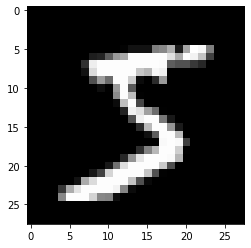

In [ ]:
plt.imshow(single_image, cmap='gray'); #Mostramos la imagen, establecemos que sea en escala de grises

### Preprocesamiento de datos

Primero debemos asegurarnos de que las etiquetas sean comprensibles para nuestra CNN.

#### Análsis de variable objetivo

In [ ]:
"""Aseguramos que las etiquetas sean entendibles"""
print(y_train.shape) #Dimension
y_train #salida, se tiene un problema en que es tipo entero y puede perjudicar ya que es un problema de clasificacion

(60000,)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
print(y_val.shape)
y_val

(10000,)


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Note que las etiquetas son literalmente categorías de números. Se necesita traducir esto para que sea "una codificación en caliente (one-hot encoding)" para que la CNN pueda entender, de lo contrario, pensará que se trata de una especie de problema de regresión en un eje continuo. Afortunadamente, Keras tiene una función fácil de usar para esto:

In [ ]:
from tensorflow.keras.utils import to_categorical #Funcion para hacer variables dummies

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_example = to_categorical(y_train)

In [ ]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
y_example.shape #Validamos el shape

(60000, 10)

In [ ]:
y_example[0] #Primer registro

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_cat_train = to_categorical(y_train, num_classes=10) #Se recomienda ser explicito con el numero de clases

In [ ]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
y_cat_val = to_categorical(y_val, num_classes=10)

In [ ]:
y_cat_val

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Procesamiento

#### Normalización de imágenes

In [ ]:
single_image.min(), single_image.max()

(0, 255)

In [ ]:
"""Es importante normalizar con 255 pixeles, es semejante por mix max scales"""
X_train = X_train/255
X_val = X_val/255

In [ ]:
scaled_single = X_train[0] #Tomamos una variable ya normalizada

In [ ]:
scaled_single.min(), scaled_single.max()

(0.0, 1.0)

In [ ]:
scaled_single.shape #No cambia la dimension

(28, 28)

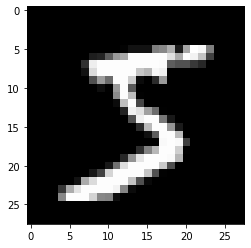

In [ ]:
plt.imshow(scaled_single, cmap='gray'); #Mostramos la imagen para comprobar que no afecta

#### Redimensionamiento

En este punto, el conjunto de entrenamiento cuenta con 60,000 imágenes almacenadas en forma tensorial de 28 por 28 píxeles.

Es viable tratar esta estructura de datos para una CNN, pero necesitamos agregar una dimensión más para afirmar que estamos tratando con 1 canal RGB (ya que técnicamente las imágenes están en blanco y negro, solo muestran valores de 0-255 en un solo canal), una imagen en color tendría 3 dimensiones.

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_val.shape

(10000, 28, 28)

Cambiar la forma para incluir la dimensión del canal (en este caso, 1 canal)

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1) #Agregamos la nueva dimension por el canal de color

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_val = X_val.reshape(10000, 28, 28, 1)

In [ ]:
X_val.shape

(10000, 28, 28, 1)

### Diseño de arquitectura

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
"""Como ejercicio tomar capa AVGPooling"""

In [ ]:
model = Sequential() #Intanciamos

"""Ejemplo de Conv3d, se usa para imagenes del cerebro."""

# CAPA CONVOLUTIONAL
model.add(Conv2D(filters=32, kernel_size=(4,4), padding='valid', input_shape=(28, 28, 1), activation='relu'))
# numero de filtros potencia de dos, padding same nos grantiza que la imagen de salida tendra la misma dimension que la imagen de entrada.
# padding valid es la pension teorica, input shape se recomienda

# CAPA POOLING
model.add(MaxPool2D(pool_size=(2, 2), strides=2)) #obtenemos un mapa de caracteristicas

# APLANADO/DESENROLLADO DE IMÁGENES DE 28x28 a 784 ANTES DE LA CAPA FINAL
model.add(Flatten()) #desenrollamos la imagen

# 128 NEURONAS EN LA CAPA OCULTA DENSA (PUEDE USTED CAMBIAR ESTE NÚMERO DE NEURONAS)
model.add(Dense(128, activation='relu'))

# LA ÚLTIMA CAPA ES EL CLASIFICADOR DE 10 CLASES POSIBLES
model.add(Dense(10, activation='softmax')) #no es salida binaria requerimos tantas unidades como numero de clases
#sofmax es la generalizacion de la sigmoide

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#en lugar de binary ponemos categorical porque son varias clases, metricas ponemos la metrica de validacion
#estan balanceadas por eso se usa accuracy

In [ ]:
model.summary() #dimensiones y parametros
"""Ejercicio dereterminar tamaño de capas de entrada y numero de parametros"""

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2) #Tratamiento de sobreajuste, no sabemos si hay

### Entrenamiento de modelo

In [ ]:
"""Entrenamiento"""
%%time
model.fit(X_train, y_cat_train, epochs=10, validation_data=(X_val, y_cat_val), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 18s 3ms/step - loss: 0.1379 - accuracy: 0.9584 - val_loss: 0.0583 - val_accuracy: 0.9824
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0481 - accuracy: 0.9850 - val_loss: 0.0394 - val_accuracy: 0.9861
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0304 - accuracy: 0.9904 - val_loss: 0.0403 - val_accuracy: 0.9874
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0209 - accuracy: 0.9933 - val_loss: 0.0389 - val_accuracy: 0.9873
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0143 - accuracy: 0.9955 - val_loss: 0.0397 - val_accuracy: 0.9878
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0105 - accuracy: 0.9964 - val_loss: 0.0361 - val_accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0080 - accuracy: 0.9974 - val_loss: 0.0447 - val_accuracy

### Evaluación de modelo

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
model.metrics_names #metricas del modelo

['loss', 'accuracy']

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.137889,0.958417,0.058262,0.9824
1,0.048100,0.984983,0.039414,0.9861
2,0.030353,0.990400,0.040342,0.9874
3,0.020901,0.993250,0.038927,0.9873
4,0.014293,0.995467,0.039725,0.9878
5,0.010549,0.996400,0.036120,0.9887
6,0.008038,0.997383,0.044734,0.9877
7,0.006935,0.997617,0.044877,0.9895


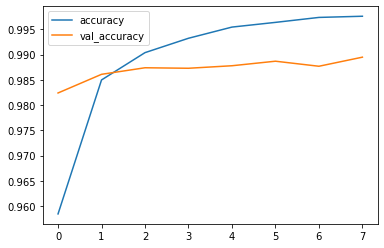

In [ ]:
losses[['accuracy','val_accuracy']].plot();

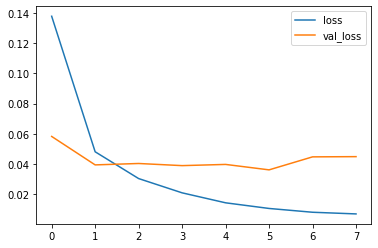

In [ ]:
losses[['loss','val_loss']].plot();

In [ ]:
print(model.metrics_names)
print(model.evaluate(X_val, y_cat_val, verbose=0))

['loss', 'accuracy']
[0.04487666115164757, 0.9894999861717224]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions_ = model.predict(X_val)
predictions = np.argmax(predictions_, axis=1)

In [ ]:
y_val, predictions

(array([7, 2, 1, ..., 4, 5, 6], dtype=uint8), array([7, 2, 1, ..., 4, 5, 6]))

In [ ]:
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
confusion_matrix(y_val, predictions)
#Da luz que puede estar pasando

array([[ 976,    0,    1,    0,    0,    0,    2,    1,    0,    0],
       [   0, 1131,    1,    1,    0,    1,    1,    0,    0,    0],
       [   3,    0, 1019,    0,    0,    0,    1,    5,    3,    1],
       [   0,    0,    0, 1003,    0,    1,    0,    3,    2,    1],
       [   0,    0,    0,    0,  973,    0,    2,    0,    0,    7],
       [   1,    0,    1,    6,    0,  881,    1,    0,    1,    1],
       [   3,    1,    1,    0,    1,    2,  949,    0,    1,    0],
       [   1,    2,    5,    0,    2,    0,    0, 1014,    1,    3],
       [   3,    2,    1,    1,    0,    1,    0,    3,  960,    3],
       [   2,    1,    0,    0,    6,    3,    0,    6,    2,  989]])

In [ ]:
import seaborn as sns

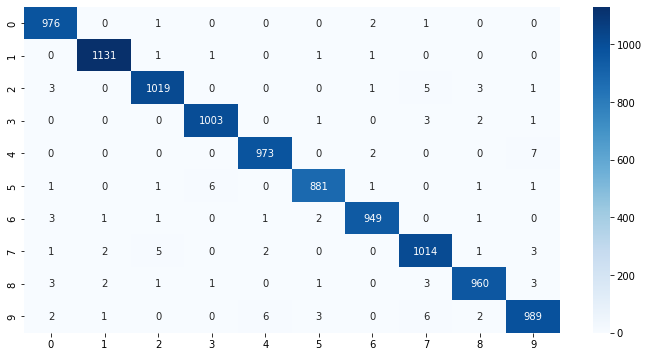

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_val, predictions), annot=True, cmap="Blues", fmt=".4g");

### Predección de modelo

In [ ]:
my_img = X_val[48] #prediccion del conj de val 

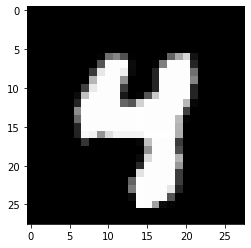

In [ ]:
plt.imshow(my_img.reshape(28,28), cmap='gray');

In [ ]:
# Recordatorio --> (numero de registros, ancho, alto, canales)
np.argmax(model.predict(my_img.reshape(1, 28, 28, 1))) #seleccionamos la categoria mas alta

4